#  import library 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("C:/Users/hp/OneDrive/Desktop/supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### check dataset shape

In [6]:
df.shape

(1000, 17)

In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [11]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Feature Engineering

* we groupby branch and perform three statistical aggregation
* agg (mena,sd,count)
* numeric aggregation

In [12]:
gb =df.groupby(['Branch'])
gb

###  add some columns and apply aggregation

In [13]:
df[['tax_branch_mean','unit_price_mean']] = gb[['Tax 5%', 'Unit price']].transform('mean')

df[['tax_branch_std','unit_price_std']] = gb[['Tax 5%', 'Unit price']].transform('std')

df[['product_count','gender_count']] = gb[['Product line', 'Gender']].transform('count')

In [14]:
df[['Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)

,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,A,14.874001,54.780853,11.030477,26.132127,340,340
1,C,16.052367,56.609024,12.531470,27.179799,328,328
2,A,14.874001,54.780853,11.030477,26.132127,340,340
3,A,14.874001,54.780853,11.030477,26.132127,340,340
4,A,14.874001,54.780853,11.030477,26.132127,340,340
5,C,16.052367,56.609024,12.531470,27.179799,328,328
6,A,14.874001,54.780853,11.030477,26.132127,340,340
7,C,16.052367,56.609024,12.531470,27.179799,328,328
8,A,14.874001,54.780853,11.030477,26.132127,340,340
9,B,15.232024,55.659277,11.545122,26.224559,332,332


In [15]:
df[['Tax 5%','Unit price','Branch','tax_branch_mean','unit_price_mean']]

,Tax 5%,Unit price,Branch,tax_branch_mean,unit_price_mean
0,26.1415,74.69,A,14.874001,54.780853
1,3.8200,15.28,C,16.052367,56.609024
2,16.2155,46.33,A,14.874001,54.780853
3,23.2880,58.22,A,14.874001,54.780853
4,30.2085,86.31,A,14.874001,54.780853
...,...,...,...,...,...
995,2.0175,40.35,C,16.052367,56.609024
996,48.6900,97.38,B,15.232024,55.659277
997,1.5920,31.84,A,14.874001,54.780853
998,3.2910,65.82,A,14.874001,54.780853


*feature engineering is not about creating "new" information, but rather directing and/or focusing the model's attention on certain information, that you as the data scientist judge to be important.

1. We use np.where() to create an indicator variable unit_price_50 that encodes 1 when unit price is above 50 and 0 otherwise.

In [16]:
df["unit_price_50"]=np.where(df['Unit price']>50,1,0)
df["unit_price_50* qty"] = df["unit_price_50"]*df["Quantity"]

In [17]:
df[["unit_price_50","unit_price_50* qty"]].head()

,unit_price_50,unit_price_50* qty
0,1,7
1,0,0
2,0,0
3,1,8
4,1,7


#### we construct a new variable log_cogs to correct for the right skew in the variable cogs.

* we construct a new variable log_cogs to correct for the right skew in the variable cogs.

* The numpy. log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements

In [18]:
df['log_cogs'] = np.log(df['cogs'] + 1)
df['gross income squared'] = np.square(df['gross income'])

In [19]:
df[['cogs','log_cogs','gross income','gross income squared',]].head()

,cogs,log_cogs,gross income,gross income squared
0,522.83,6.261167,26.1415,683.378022
1,76.40,4.348987,3.8200,14.592400
2,324.31,5.784779,16.2155,262.942440
3,465.76,6.145815,23.2880,542.330944
4,604.17,6.405509,30.2085,912.553472


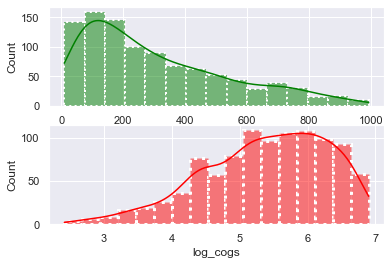

In [20]:
plt.subplot(2,1,1) 
sns.histplot(df['cogs'],color='green', linestyle=':',linewidth=2,kde = True)
plt.subplot(2,1,2)
sns.histplot(df['log_cogs'],color='red',linestyle=':',linewidth=3,kde=True)
plt.show()

In [21]:
def plot_hist(data1, data2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data1, ax=ax1, kde=True)
    sns.histplot(data2, ax=ax2, kde=True);

## Numeric Scaling

In [22]:
from sklearn.preprocessing import StandardScaler 


### We can see the range of gross income and Rating currently in our dataset:

In [23]:
gincome = df['gross income']
rating = df['Rating']

Gross income range: 0.5085 to 49.65
Rating range:4.0 to 10.0


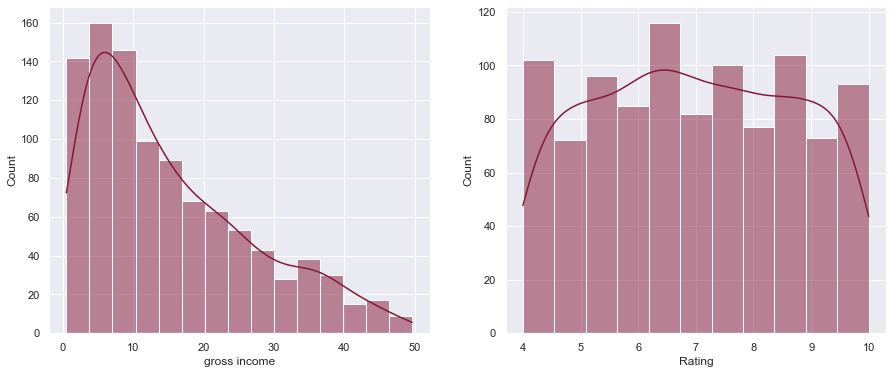

In [24]:
print(f'Gross income range: {gincome.min()} to {gincome.max()}')
print(f'Rating range:{rating.min()} to {rating.max()}')
plot_hist(gincome,rating)

* We can see the difference in scale after applying normalization below.

In [25]:
df[["gross income","Rating"]]=StandardScaler().fit_transform(df[["gross income","Rating"]])

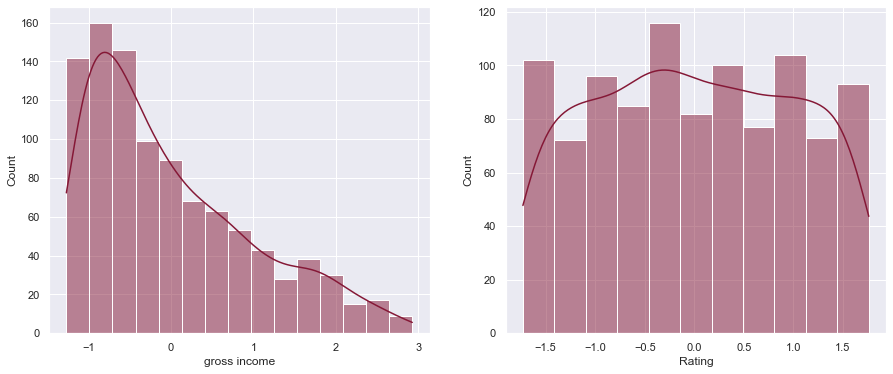

In [26]:
plot_hist(df['gross income'],df["Rating"])

# Categorical Variable Handling

* one-hot encoding
* Machine learning models can only handle numeric variables. Therefore we must encode categorical variables as numeric ones.
* The easiest way to do this is to 'one-hot-encode' them which means we create n indicator variables for a categorical column with n categories. 
* our model will take much longer to train and find the optimal predictor weights.

In [27]:
pd.get_dummies(df[['Gender','Payment']]).head()

,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,1
1,1,0,1,0,0
2,0,1,0,1,0
3,0,1,0,0,1
4,0,1,0,0,1


In [28]:
means = df.groupby(["Product line"])['Rating'].mean()
means

Product line
Electronic accessories   -0.027941
Fashion accessories       0.032900
Food and beverages        0.081805
Health and beauty         0.017808
Home and lifestyle       -0.078709
Sports and travel        -0.032855
Name: Rating, dtype: float64

In [30]:
df['Product line target encoded'] = df['Product line'].map(means)
df[['Product line','Product line target encoded','Rating']]   

,Product line,Product line target encoded,Rating
0,Health and beauty,0.017808,1.238443
1,Electronic accessories,-0.027941,1.529527
2,Home and lifestyle,-0.078709,0.248760
3,Health and beauty,0.017808,0.830927
4,Sports and travel,-0.032855,-0.973790
...,...,...,...
995,Health and beauty,0.017808,-0.449840
996,Home and lifestyle,-0.078709,-1.497741
997,Food and beverages,0.081805,0.423410
998,Home and lifestyle,-0.078709,-1.672391


### Date-Time Decomposition

In [32]:
df["Date"] = pd.to_datetime(df["Date"])
df[["Date"]].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [33]:
df['Year'] = df['Date'].dt.year
df['Month']  = df["Date"].dt.month
df['Day'] = df['Date'].dt.day
df[['Year','Month','Day']].head()

,Year,Month,Day
0,2019,1,5
1,2019,3,8
2,2019,3,3
3,2019,1,27
4,2019,2,8
